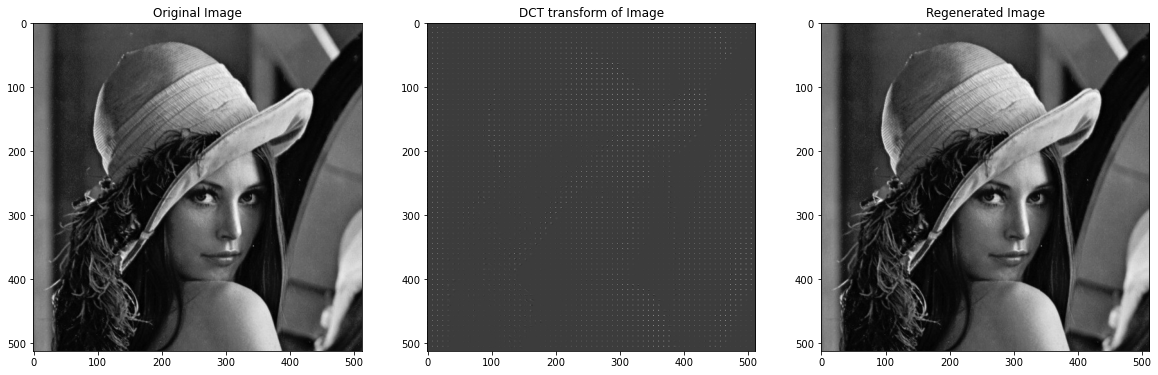

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm


B = 8 #blocksize
img1 = cv2.imread(r"C:\Users\sudar\Desktop\IIST\main\Sem1\IVP_LAB\Lab1\lenna.jpg",cv2.IMREAD_GRAYSCALE)
h,w=np.array(img1.shape[:2])/B * B
h=int(h);w=int(w);
img1=img1[:h,:w]

blocksV=int(h/B)
blocksH=int(w/B)
vis0 = np.zeros((h,w), np.float32)
Trans = np.zeros((h,w), np.float32)
vis0[:h, :w] = img1
for row in range(blocksV):
	for col in range(blocksH):
		currentblock = cv2.dct(vis0[row*B:(row+1)*B,col*B:(col+1)*B])
		Trans[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock
cv2.imwrite( 'Transformed.jpg', Trans )

back0 = np.zeros((h,w), np.float32)
for row in range(blocksV):
    for col in range(blocksH):
        currentblock = cv2.idct(Trans[row*B:(row+1)*B,col*B:(col+1)*B])
        back0[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock
cv2.imwrite('BackTransformed.jpg', back0 )

fig = plt.figure(figsize = (20, 60))
fig.add_subplot(1,3,1)
plt.imshow(img1,cmap="gray")
plt.title("Original Image")
fig.add_subplot(1,3,2)
plt.imshow(Trans,cmap="gray")
plt.title("DCT transform of Image")
fig.add_subplot(1,3,3)
plt.imshow(back0,cmap="gray")
plt.title("Regenerated Image")
plt.show()